In [ ]:
# !pip install pymc
import pymc as pm
from scipy import stats
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import statsmodels.api as sm
!pip install pingouin
import pingouin as pg

az.style.use('arviz-darkgrid')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
with pm.Model():
  theta = pm.Beta('theta', alpha = 1, beta = 1)
  y = pm.Bernoulli('y', p = theta, observed = [1, 1, 0, 1, 1])
  trace = pm.sample(1000)



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

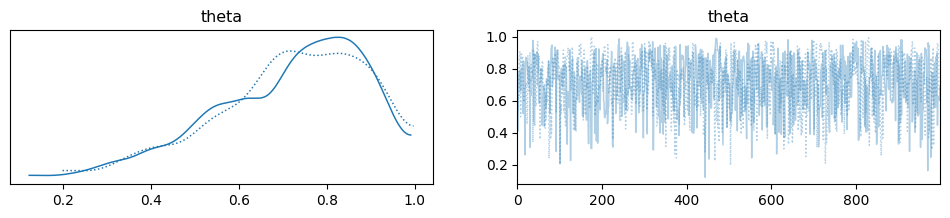

In [ ]:
az.plot_trace(trace)

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

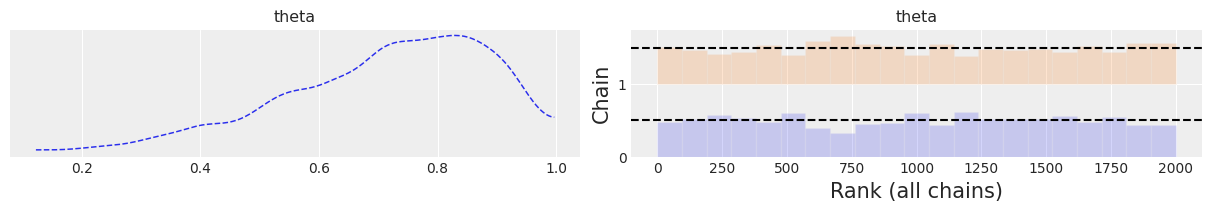

In [ ]:
az.plot_trace(trace,kind = "rank_bars",combined = True)

In [ ]:
az.summary(trace,kind = "stats").round(2)

,mean,sd,hdi_3%,hdi_97%
theta,0.72,0.16,0.39,0.97


<Axes: title={'center': 'theta'}>

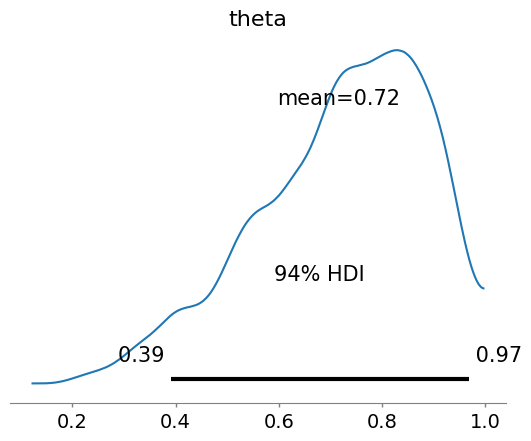

In [ ]:
az.plot_posterior(trace,var_names = ["theta"])

# A Model with Gaussian Prior

In [ ]:
data = np.loadtxt('/content/chemical_shifts.csv')

with pm.Model() as model_g:
  mu = pm.Uniform("prior",lower = 40, upper = 70)
  sigma = pm.HalfNormal('sigma', sigma = 5)
  y = pm.Normal("y", mu = mu, sigma = sigma, observed = data)
  trace = pm.sample()

Output()

Output()

array([[<Axes: title={'center': 'prior'}>,
        <Axes: title={'center': 'prior'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

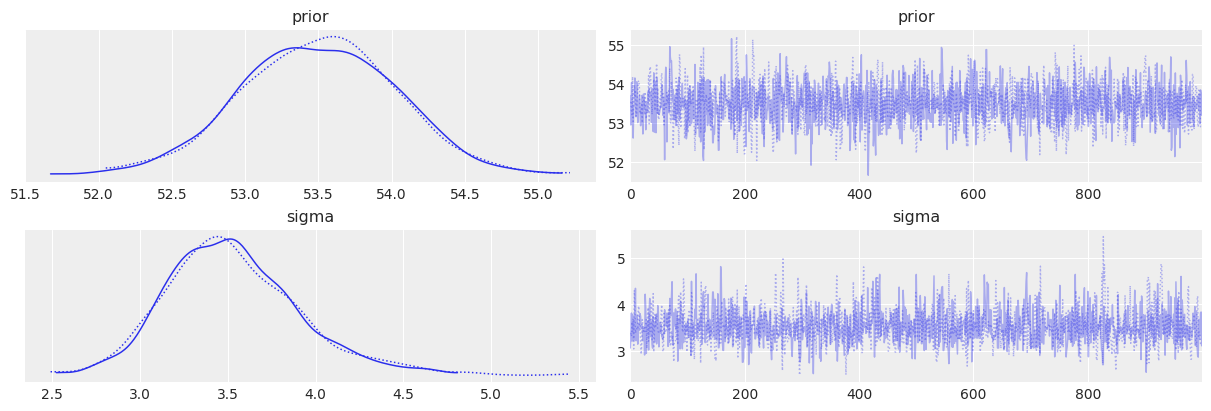

In [ ]:
az.plot_trace(trace)

In [ ]:
az.summary(trace,kind = "stats").round(2)

,mean,sd,hdi_3%,hdi_97%
prior,53.50,0.52,52.54,54.5
sigma,3.53,0.38,2.87,4.3


In [ ]:
pm.sample_posterior_predictive(trace,
                               model = model_g,
                               extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

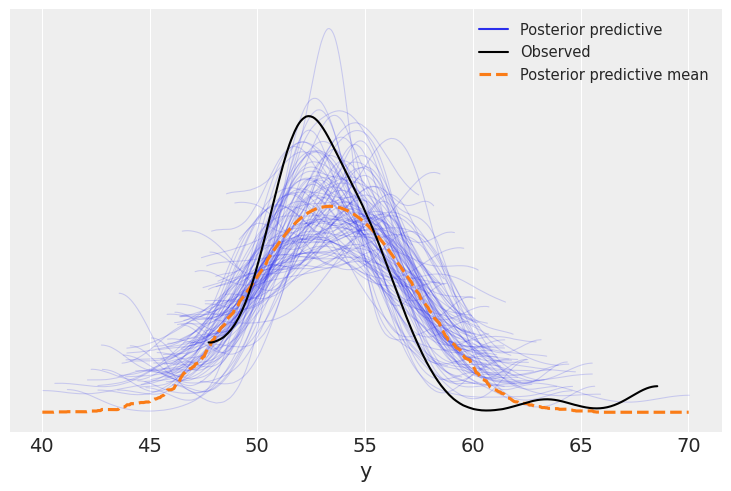

In [ ]:
az.plot_ppc(trace,
            num_pp_samples=100)

# A Model with T-Distributed Prior

More Robust

In [ ]:
with pm.Model() as model_t:
  mu = pm.Uniform("prior",lower = 40, upper = 70)
  sigma = pm.HalfNormal('sigma', sigma = 10)
  dof = pm.Exponential('dof', 1/30)
  y = pm.StudentT("y", mu = mu, sigma = sigma, nu = dof, observed = data)
  trace = pm.sample()

Output()

Output()

array([[<Axes: title={'center': 'dof'}>, <Axes: title={'center': 'dof'}>],
       [<Axes: title={'center': 'prior'}>,
        <Axes: title={'center': 'prior'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

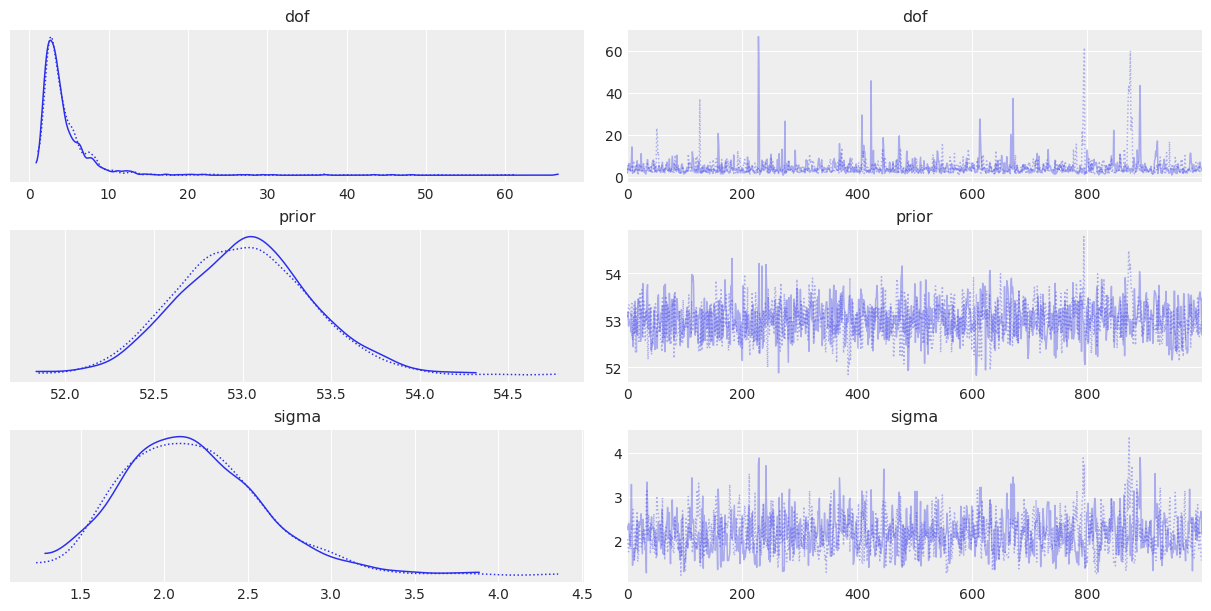

In [ ]:
az.plot_trace(trace)

In [ ]:
az.summary(trace,kind = "stats").round(2)

,mean,sd,hdi_3%,hdi_97%
dof,4.63,4.68,1.19,9.21
prior,53.01,0.38,52.33,53.74
sigma,2.16,0.42,1.40,2.93


In [ ]:
posterior = trace.posterior

In [ ]:
posterior.sel(draw = 0, chain = [0,1])

<xarray.Dataset> Size: 72B
Dimensions:  (chain: 2)
Coordinates:
  * chain    (chain) int64 16B 0 1
    draw     int64 8B 0
Data variables:
    dof      (chain) float64 16B 2.21 1.592
    prior    (chain) float64 16B 53.07 53.08
    sigma    (chain) float64 16B 2.334 2.046
Attributes:
    created_at:                 2024-09-28T09:59:30.145534+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2
    sampling_time:              7.5212109088897705
    tuning_steps:               1000

In [ ]:
stacked = az.extract(trace)
stacked

<xarray.Dataset> Size: 96kB
Dimensions:  (sample: 2000)
Coordinates:
  * sample   (sample) object 16kB MultiIndex
  * chain    (sample) int64 16kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
  * draw     (sample) int64 16kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    dof      (sample) float64 16kB 2.21 4.298 4.757 6.323 ... 2.774 2.465 2.613
    prior    (sample) float64 16kB 53.07 53.17 52.88 53.01 ... 52.75 52.96 52.98
    sigma    (sample) float64 16kB 2.334 2.258 2.395 2.332 ... 2.038 1.63 1.562
Attributes:
    created_at:                 2024-09-28T09:59:30.145534+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2
    sampling_time:              7.5212109088897705
    tuning_steps:               1000

In [ ]:
az.extract(trace, num_samples = 100)

<xarray.Dataset> Size: 5kB
Dimensions:  (sample: 100)
Coordinates:
  * sample   (sample) object 800B MultiIndex
  * chain    (sample) int64 800B 1 1 1 0 0 0 1 0 1 1 1 ... 0 1 0 1 1 1 1 0 0 0 1
  * draw     (sample) int64 800B 716 91 195 269 747 740 ... 989 425 20 925 898
Data variables:
    dof      (sample) float64 800B 2.913 2.829 7.476 13.06 ... 5.98 4.938 3.065
    prior    (sample) float64 800B 52.74 53.22 52.6 52.92 ... 53.42 53.74 52.75
    sigma    (sample) float64 800B 2.04 1.752 3.051 3.081 ... 2.438 2.148 2.015
Attributes:
    created_at:                 2024-09-28T09:59:30.145534+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2
    sampling_time:              7.5212109088897705
    tuning_steps:               1000

In [ ]:
tips = pd.read_csv("https://raw.githubusercontent.com/jhrcook/bayesian-analysis-with-python_e2/refs/heads/master/data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
categories = np.array(["Thur","Fri","Sat","Sun"])
tip = tips.tip.values
idx = pd.Categorical(tips.day, categories = categories).codes

In [ ]:
# with pm.Model() as comparing_groups:
#   mu = pm.Normal("mu", mu = 0, sigma = 10,shape = 4)
#   sigma = pm.HalfNormal("sigma", sigma = 10, shape = 4)
#   y = pm.Normal("y", mu = mu[idx], sigma = sigma[idx], observed = tip)
#   trace = pm.sample()

coords = {"days": categories,"days_flat": categories[idx]}
with pm.Model(coords = coords) as comparing_groups:
  mu = pm.HalfNormal("mu", sigma = 5, dims = "days")
  sigma = pm.HalfNormal("sigma", sigma = 1, dims = "days")
  y = pm.Gamma("y", mu = mu[idx], sigma = sigma[idx], dims = "days_flat", observed = tip)
  trace = pm.sample()
  trace.extend(pm.sample_posterior_predictive(trace))


Output()

Output()

Output()

array([<Axes: xlabel='y\nSun'>, <Axes: xlabel='y\nSat'>,
       <Axes: xlabel='y\nThur'>, <Axes: xlabel='y\nFri'>], dtype=object)

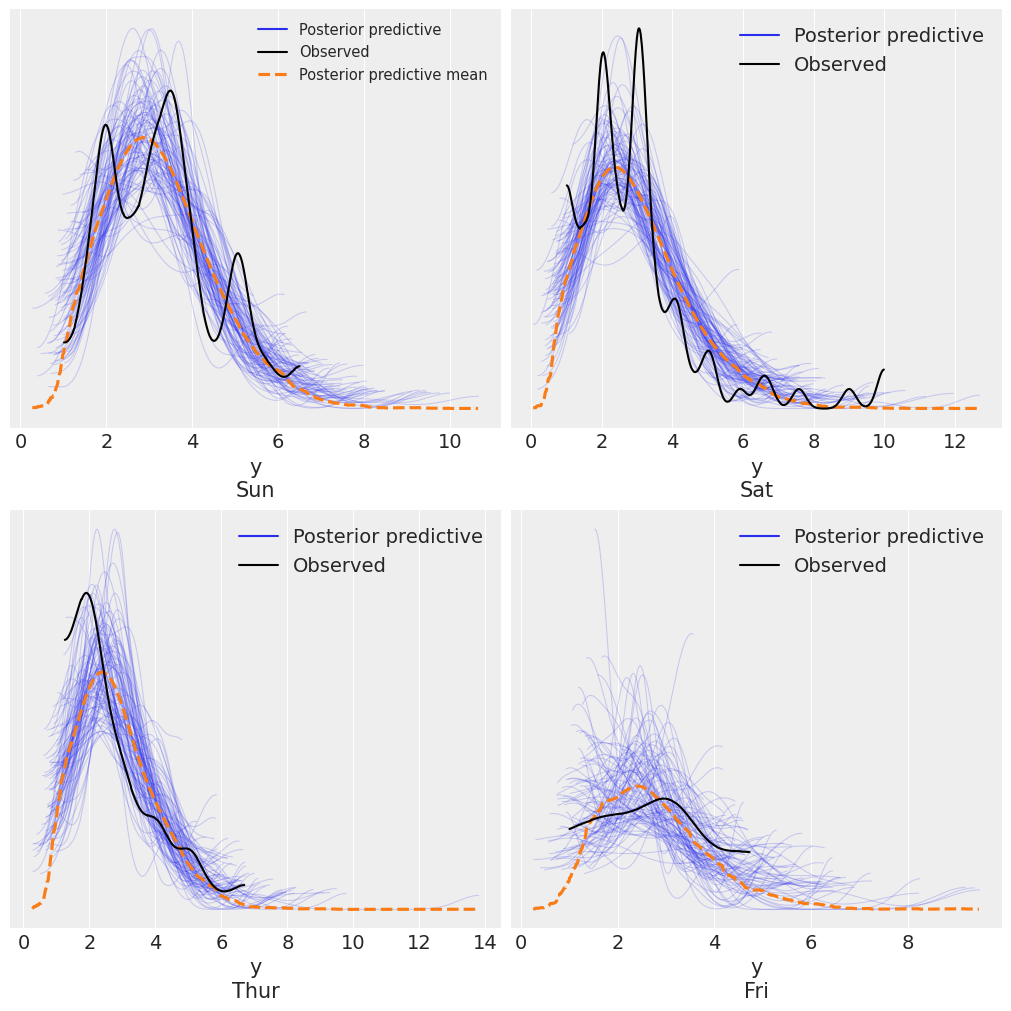

In [ ]:
_,axes = plt.subplots(2,2,figsize = (10,10))
az.plot_ppc(trace, num_pp_samples = 100, ax = axes,
            flatten = [],
            coords = {"days_flat": [categories]
                      })


# Binom Model

## Jeffry's Scale ve Frequentist Yaklaşım

H0: Hamile olan birinin kntrol veya tedavi grubundan gelme ihtimali eşittir. (P = 0.5)

H1: Tedavi grubundan gelme ihtimali daha düşüktür. (P < 0.5)

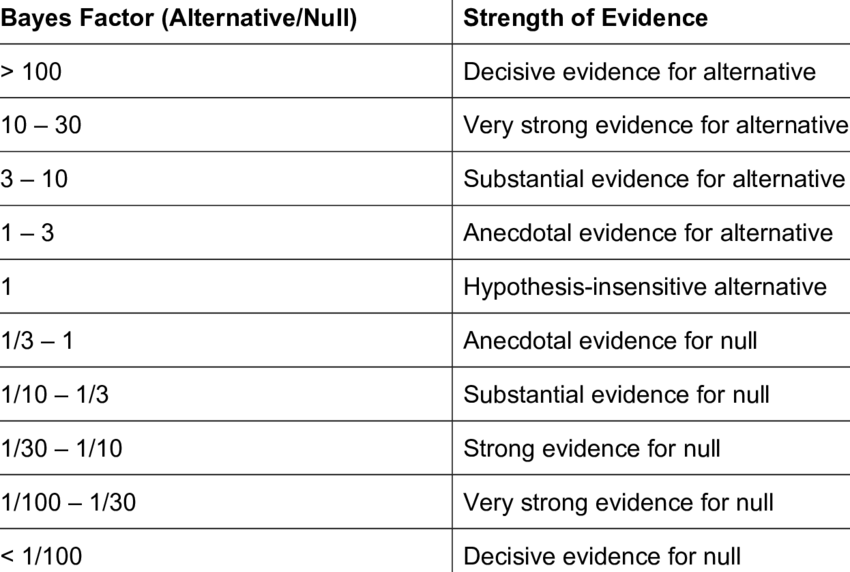

In [ ]:
#freq
n = 20   # Toplam deneme sayısı
k = 4    # Pozitif çıkan örnek sayısı
p = 0.5  # Başarı olasılığı

# Binom testi
result = stats.binomtest(k, n, p,alternative='less')
result

BinomTestResult(k=4, n=20, alternative='less', statistic=0.2, pvalue=0.005908966064453125)

In [ ]:
pg.bayesfactor_binom(k = k, n = n, p = 0.5)

10.305921666912376

Alternatif hipotezin doğruluğu hakkında yeterli miktarda veri vardır.

## Effect Size

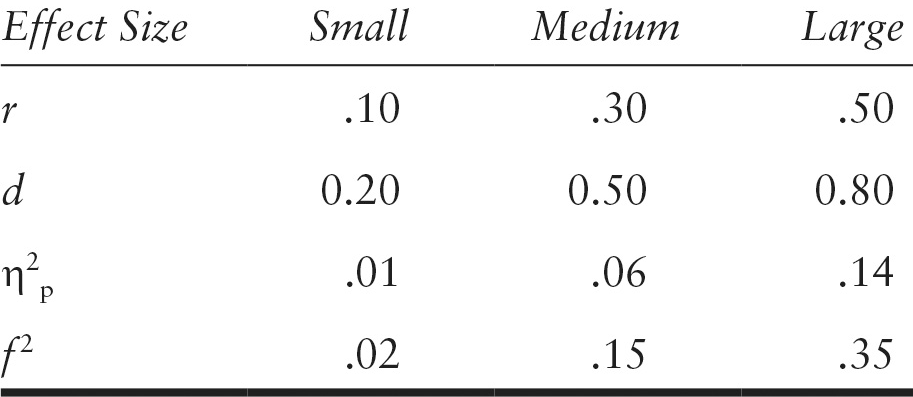

In [ ]:
x = [1]*4 + [0]*16
y = [1]*12 + [0]*8
pg.compute_effsize(x = x,y = y)

-0.8717797887081344

## Bayesçi Yaklaşım

Frequentist yaklaşıma göre tedavi etkilidir.

Bir de Bayes İstatistiğinin sonuçlarına bakalım.

In [ ]:
# Parametreler
n = 20   # Toplam deneme sayısı
k = 4    # Pozitif çıkan örnek sayısı

# Bayesyen model
with pm.Model() as model:
    # Öncelik dağılımı (Beta dağılımı)
    p = pm.Beta('p', alpha=1, beta=1)  # Uniform prior

    # Gözlemlenen veri için binom dağılımı
    y_obs = pm.Binomial('y_obs', n=n, p=p, observed=k)

    # Örnekleme
    trace = pm.sample(2000, tune=1000)



Output()

Output()

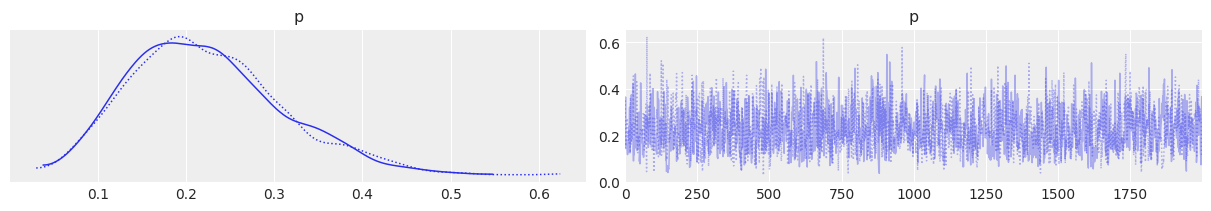

    mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.223  0.087     0.067      0.393      0.002    0.001    1677.0    1730.0   

   r_hat  
p    1.0  


In [ ]:
# Sonuçların analizi
pm.plot_trace(trace)
plt.show()

# Özet istatistik
summary = pm.summary(trace, hdi_prob=0.95)
print(summary)

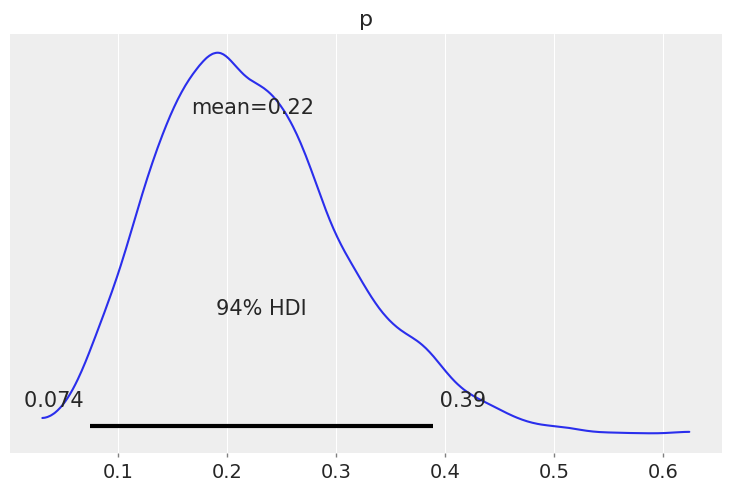

In [ ]:
p_values = trace.posterior['p'].values.flatten()
pm.plot_posterior(trace)
plt.show()

In [ ]:
kde_func = gaussian_kde(p_values)
for i in np.arange(0.1,1,0.1):
  print(i,kde_func(i))

0.1 [1.98653506]
0.2 [4.60366908]
0.30000000000000004 [2.45416163]
0.4 [0.77923533]
0.5 [0.09603771]
0.6 [0.00775478]
0.7000000000000001 [2.30948322e-07]
0.8 [2.71669291e-27]
0.9 [5.12945305e-63]


Bayes istatistiğine göre de gerçek olasılığın 0.2 olma ihtimali diğer olasılık değerlerinden yüksektir.

#MNM Deneyi

* H0: P = 0.1
* H1: P > 0.1

n = 20; k = 4

In [ ]:
stats.binomtest(k = 4, n = 20, p = 0.1,alternative = "greater")

BinomTestResult(k=4, n=20, alternative='greater', statistic=0.2, pvalue=0.1329533234343351)

Frequentist yaklaşıma göre p = 0.1 daha doğru. Peki şöyle yapsaydık:

* H0: P = 0.2
* H1: P < 0.2

In [ ]:
stats.binomtest(k = 4, n = 20, p = 0.2,alternative = "less")

BinomTestResult(k=4, n=20, alternative='less', statistic=0.2, pvalue=0.6296482639026687)

Bu sefer de p = 0.2 daha doğru. **Frequentist yaklaşım H0'ın nasıl kurulduğuna hassastır.**

Bir de Bayesian deneyelim.

In [ ]:
with pm.Model() as model:
  p = pm.Beta("p", alpha = 0.1, beta = 0.1)
  y = pm.Binomial("y", p = p, n = 20, observed = 4)
  trace = pm.sample(1000)

Output()

Output()

In [ ]:
p_values = trace.posterior['p'].values.flatten()
kde_function = gaussian_kde(p_values)

for i in np.arange(0.1,1,0.1):
  print(i,kde_function(i))

0.1 [2.68774093]
0.2 [4.39937124]
0.30000000000000004 [1.99188382]
0.4 [0.44140684]
0.5 [0.08101777]
0.6 [0.01998506]
0.7000000000000001 [1.64366335e-09]
0.8 [3.8061872e-29]
0.9 [2.00959844e-61]


Bayesian İstatistiğine göre gerçek olasılığın 0.2 olma ihtimali 0.1'den yüksektir.

# Bayesian Update for Probabilities

Posterior dağılımı prior dağılımı olarak kullanmak

## Beta-Binom

Output()

Output()

<Axes: title={'center': 'prior'}>

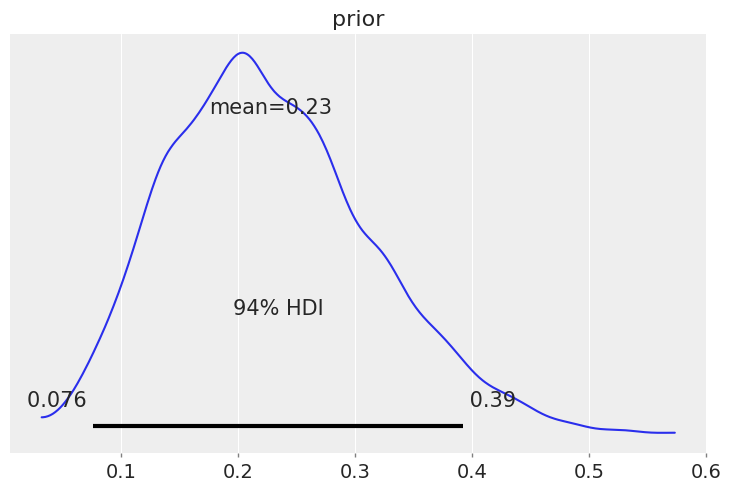

In [ ]:
n1 = 20
k1 = 4

with pm.Model() as update_model1:
  prior = pm.Beta("prior", alpha = 1, beta = 1)
  likelihood = pm.Binomial("likelihood", p = prior, n = n1, observed = k1)
  trace1 = pm.sample(2000, tune = 1000, return_inferencedata = True)

az.plot_posterior(trace1)

In [ ]:
p_values = trace1.posterior["prior"].values.flatten()
new_prior = np.histogram(p_values,bins = 100)
#BETA DAĞILIMINA UYDURUP PRIPOR OLARAK KULLANMAK
# updated_alpha,updated_beta,_,_ = stats.beta.fit(p_values) #yeni alpha ve beta değerlerini bul
# print(updated_alpha,updated_beta)

# n2 = 30
# k2 = 10

# with pm.Model() as update_model2:
#   prior = pm.Beta("prior", alpha = updated_alpha, beta = updated_beta)
#   likelihood = pm.Binomial("likelihood", p = prior, n = n2, observed = k2)
#   trace2 = pm.sample(2000, tune = 1000, return_inferencedata = True)

# az.plot_posterior(trace2)

`pm.Interpolated` ile yeni bir dağılım elde ederiz. Dağılımın X ve y girdilerini elde etmek için `np.histogram` kullanırız. X'in boyu Y'den 1 fazladır. O yüzden ilk değeri elimine ederiz.

Output()

Output()

ERROR:pymc.stats.convergence:There were 38 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: title={'center': 'prior'}>

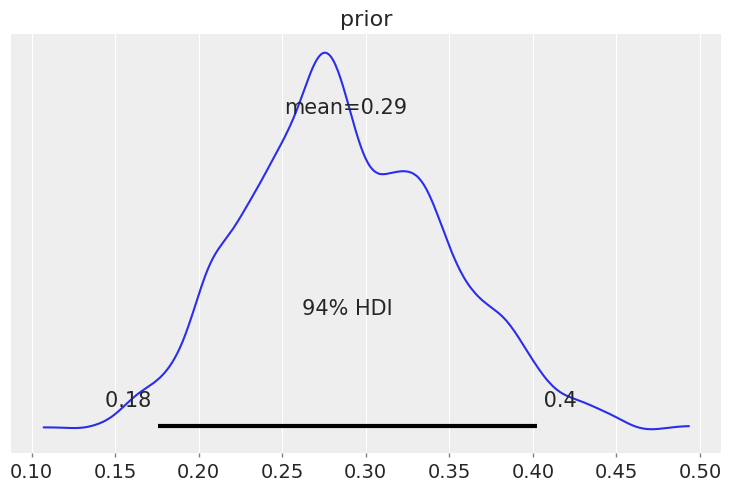

In [ ]:
n2 = 30
k2 = 10

with pm.Model() as update_model2:

  prior = pm.Interpolated(x_points = new_prior[1][1:], #aynı boyutta olmaları için
                          pdf_points = new_prior[0],
                          name = "prior")
  likelihood = pm.Binomial("likelihood", p = prior, n = n2, observed = k2)
  trace2 = pm.sample(2000, tune = 1000, return_inferencedata = True)

az.plot_posterior(trace2)

In [ ]:
kde = gaussian_kde(trace2.posterior["prior"].values.flatten())

for i in np.arange(0.1,1,0.1):
  print(i,kde(i))

0.1 [0.03547451]
0.2 [4.11848598]
0.30000000000000004 [5.16978821]
0.4 [0.62474502]
0.5 [0.0205493]
0.6 [6.13089872e-13]
0.7000000000000001 [1.00596181e-56]
0.8 [4.51657863e-135]
0.9 [5.5489087e-248]


## Normal - Normal

Output()

Output()

<Axes: title={'center': 'prior'}>

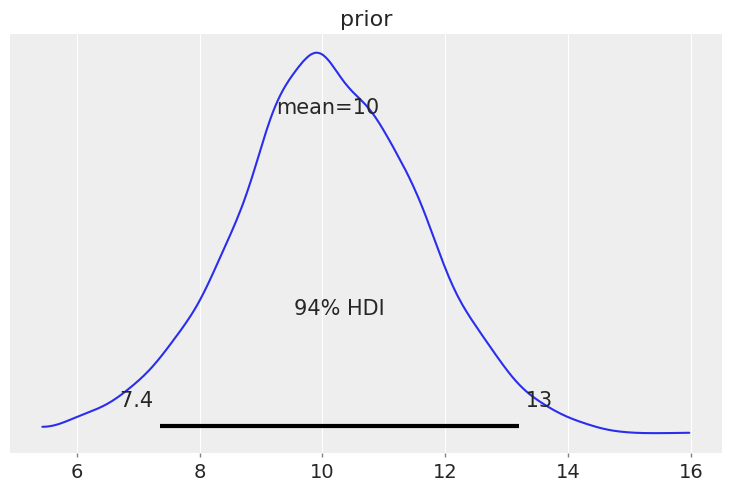

In [ ]:
prior_mean = 10
prior_sd = 2

with pm.Model() as update_model3:
  prior = pm.Normal("prior", mu = prior_mean, sigma = prior_sd)
  likelihood = pm.Normal("likelihood", mu = prior, sigma = 5, observed = [10,9,10.5,11,10])
  trace3 = pm.sample(2000, tune = 1000, return_inferencedata = True)

az.plot_posterior(trace3)

In [ ]:
# updated_mean,updated_sd = stats.norm.fit(trace3.posterior["prior"].values.flatten())
# print(updated_mean,updated_sd)

new_prior_values = trace3.posterior["prior"].values.flatten()
new_prior_dist_prep = np.histogram(new_prior_values,bins = 100)

Output()

Output()

ERROR:pymc.stats.convergence:There were 21 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: title={'center': 'prior2'}>

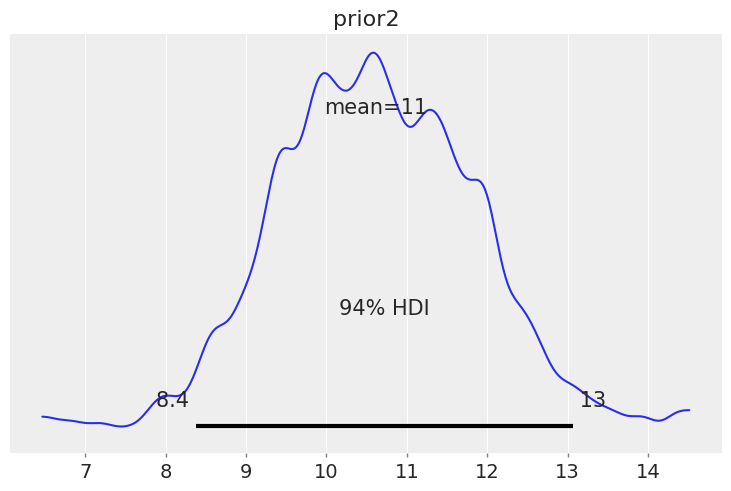

In [ ]:
with pm.Model() as update_model4:
  new_prior_dist = pm.Interpolated(x_points = new_prior_dist_prep[1][1:],
                                 pdf_points = new_prior_dist_prep[0],
                                 name = "prior2")

  likelihood2 = pm.Normal("likelihood2", mu = new_prior_dist, sigma = 5, observed = [10,9,10.5,13,15])
  trace4 = pm.sample(2000, tune = 1000, return_inferencedata = True)

az.plot_posterior(trace4)

## Gamma - Poisson

20 yılda 15 ünitede at tekmesiyle ölen insan sayısı 200.

YANLIŞ. ÇIKARAMADIM.

In [ ]:
lambda_poisson = 0.75 #inanılan sıklık (per unit,year)
std = 1 #inanılan sıklık standart sapması

alpha = (lambda_poisson ** 2) / (std ** 2)
beta = lambda_poisson / (std ** 2)
alpha,beta

(0.5625, 0.75)

Output()

Output()

ERROR:pymc.stats.convergence:There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: title={'center': 'prior'}>

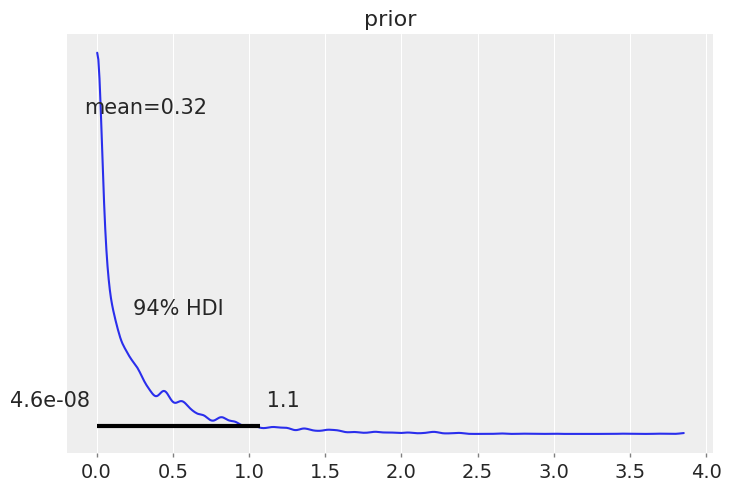

In [ ]:
with pm.Model() as update_model5:
  prior = pm.Gamma("prior", alpha = alpha, beta = beta)
  likelihood = pm.Poisson("likelihood", mu = prior, observed = 200/300)
  trace5 = pm.sample(2000, tune = 1000, return_inferencedata = True)

az.plot_posterior(trace5)

In [ ]:
summary = az.summary(trace5)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
prior,0.321,0.414,0.0,1.073,0.009,0.007,845.0,892.0,1.0


# Bayesian Hypthesis Testing

Hipotez testlerinde mutlaka prior olarak Cauchy dağılımını kullan. Student-t'nin dof = 1 olan bu dağılım geniş kuyrukları sayesinde hipotez testlerinde weakly informative prior olarak görev alabilir.

In [ ]:
data = pd.read_csv("tapwater.csv")
data.head()

,Unnamed: 0,date,tthm,samples,nondetects,min,max
0,1,2009-02-25,34.38,8,0,32.0,39.0
1,2,2008-12-22,39.33,9,0,31.0,46.0
2,3,2008-09-25,108.63,8,0,85.0,120.0
3,4,2008-05-14,88.00,8,0,75.0,94.0
4,5,2008-04-14,81.00,2,0,81.0,81.0


In [ ]:
zeros = data[data.nondetects == 0]["tthm"].values
ones = data[data.nondetects == 1]["tthm"].values

In [ ]:
with pm.Model() as hypotesis_model:
  mu_0 = pm.Cauchy("mu_0", alpha = 35, beta = 1) #location, scale
  mu_1 = pm.Cauchy("mu_1", alpha = 35, beta = 1) #35 kitapta yazıyordu.

  sigma_0 = pm.HalfNormal("sigma_0", sigma = 10)
  sigma_1 = pm.HalfNormal("sigma_1", sigma = 10)

  zero = pm.Normal("zero", mu = mu_0, sigma = sigma_0, observed = zeros)
  one = pm.Normal("one", mu = mu_1, sigma = sigma_1, observed = ones)

  diff_of_means = pm.Deterministic("diff_of_means", mu_0 - mu_1)

  trace = pm.sample(2000, tune = 1000, return_inferencedata = True)
  trace.extend(pm.sample_posterior_predictive(trace))

Output()

Output()

ERROR:pymc.stats.convergence:There were 20 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

In [ ]:
summary = az.summary(trace, hdi_prob=0.95)
summary

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
diff_of_means,17.568,6.113,5.001,29.581,0.208,0.147,975.0,837.0,1.00
mu_0,53.907,4.755,44.333,63.300,0.112,0.079,1830.0,1823.0,1.00
mu_1,36.338,3.760,30.658,45.582,0.155,0.112,898.0,934.0,1.01
sigma_0,22.430,2.749,17.166,27.635,0.064,0.046,1868.0,1677.0,1.00
sigma_1,9.675,4.956,0.376,19.055,0.128,0.090,977.0,535.0,1.00


<Axes: title={'center': 'diff_of_means'}>

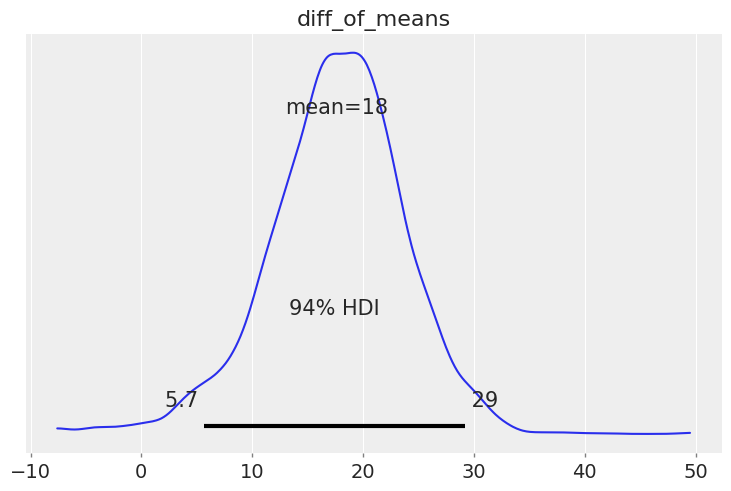

In [ ]:
az.plot_posterior(trace, var_names=["diff_of_means"])

0, credible interval'de bulunmadığından iki dağılım arasında fark var deriz.

In [ ]:
zinc_data = pd.read_csv("zinc_data.csv")
zinc_data.head()

,Unnamed: 0,location,bottom,surface,difference
0,1,1,0.430,0.415,0.015
1,2,2,0.266,0.238,0.028
2,3,3,0.567,0.390,0.177
3,4,4,0.531,0.410,0.121
4,5,5,0.707,0.605,0.102


# Bağımlı değişkenlerle Hipotez Testi (Fark Değişkenleri)

In [ ]:
observed_diff = zinc_data.difference.values
observed_diff

array([0.015, 0.028, 0.177, 0.121, 0.102, 0.107, 0.019, 0.066, 0.058,
       0.111])

In [ ]:
with pm.Model() as hypotesis_model2:
  mu_diff = pm.Cauchy("mu_diff", alpha = 0, beta = 1)
  sigma_diff = pm.HalfNormal("sigma_diff", sigma = 1)
  difference_obs = pm.Normal("difference_obs", mu = mu_diff, sigma = sigma_diff, observed = observed_diff)
  trace = pm.sample(2000, tune = 1000, return_inferencedata = True)


Output()

Output()

array([[<Axes: title={'center': 'mu_diff'}>,
        <Axes: title={'center': 'mu_diff'}>],
       [<Axes: title={'center': 'sigma_diff'}>,
        <Axes: title={'center': 'sigma_diff'}>]], dtype=object)

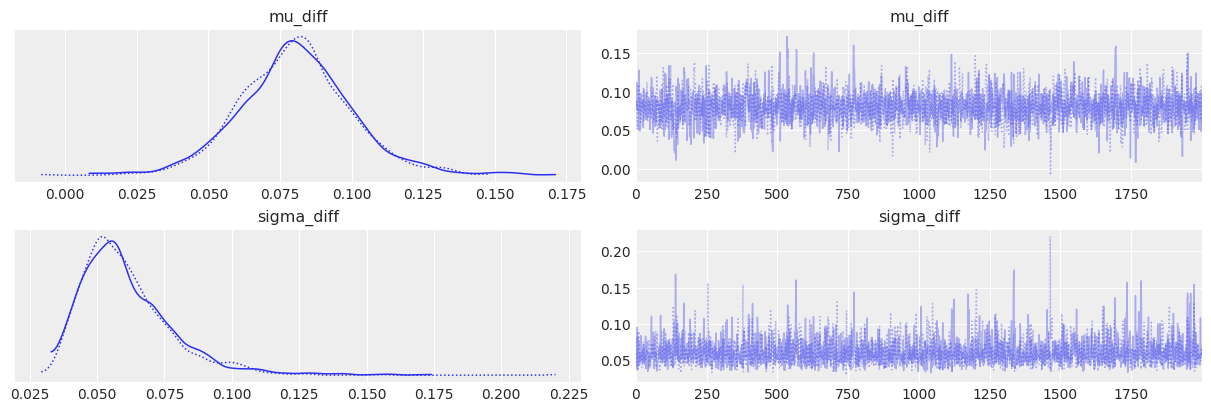

In [ ]:
az.plot_trace(trace)

In [ ]:
az.summary(trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_diff,0.080,0.020,0.040,0.119,0.0,0.0,2029.0,1839.0,1.0
sigma_diff,0.061,0.017,0.034,0.093,0.0,0.0,2479.0,2762.0,1.0


<Axes: title={'center': 'mu_diff'}>

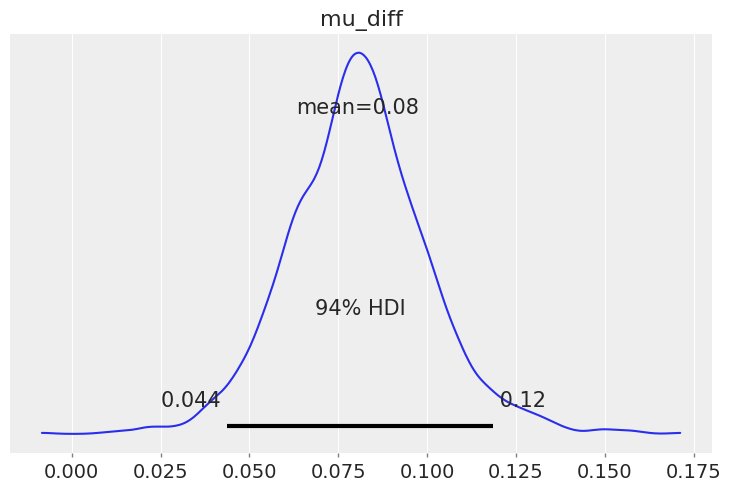

In [ ]:
az.plot_posterior(trace, var_names=["mu_diff"])

In [ ]:
null_hypothesis = 0
posterior_samples = trace.posterior['mu_diff']

# Posterior yoğunluk fonksiyonunu elde edelim
kde = stats.gaussian_kde(posterior_samples.values.flatten())
posterior_density_at_null = kde(null_hypothesis)

# Öncel (prior) yoğunluk fonksiyonu
# r=1 parametresi ile merkezi Cauchy yoğunluğunu kullanıyoruz
from scipy.stats import cauchy
prior_density_at_null = cauchy.pdf(null_hypothesis, loc=0, scale=1)

# Bayes Faktörü
bayes_factor = prior_density_at_null / posterior_density_at_null
print(f"Bayes Factor (H1 : H0): {bayes_factor}")

Bayes Factor (H1 : H0): [63.59882986]


0, HDI'nın içinde yer almadığından gruplar arasında fark olduğu sonucuna varırız.

# Bağımsız Değişkenlerle Hipotez Testi

In [ ]:
data = pd.read_csv("nc_data.csv")
data.head()

,Unnamed: 0,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,1,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,2,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,3,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,4,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,5,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [ ]:
mu_diff

mu_diff

In [ ]:
group1 = data[data.mature == 'younger mom']["gained"].values
group2 = data[data.mature == 'mature mom']["gained"].values


with pm.Model() as hypotesis_model2:
  mu_0 = pm.Cauchy("mu_0", alpha = 0, beta = 0.5)
  mu_1 = pm.Cauchy("mu_1", alpha = 0, beta = 0.5)

  sigma_0 = pm.HalfNormal("sigma_0", sigma = 1)
  sigma_1 = pm.HalfNormal("sigma_1", sigma = 1)

  group1_data = pm.Normal("group1_data", mu = mu_0 - 0.05/2, sigma = sigma_0, observed = group1)
  group2_data = pm.Normal("group2_data", mu = mu_1 + 0.05/2, sigma = sigma_1, observed = group2)

  diff_of_means = pm.Deterministic("diff_of_means", mu_0 - mu_1)
  trace = pm.sample(2000, tune = 1000, return_inferencedata = True)
  trace.extend(pm.sample_posterior_predictive(trace))

/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1366: ImputationWarning: Data in group1_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1366: ImputationWarning: Data in group2_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

In [ ]:
summary = az.summary(trace, hdi_prob=0.95)
summary

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (be

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
diff_of_means,1.836,1.026,-0.219,3.798,0.010,0.009,10053.0,2981.0,1.0
group1_data[0],38.000,0.000,38.000,38.000,0.000,0.000,4000.0,4000.0,NaN
group1_data[1],20.000,0.000,20.000,20.000,0.000,0.000,4000.0,4000.0,NaN
group1_data[2],38.000,0.000,38.000,38.000,0.000,0.000,4000.0,4000.0,NaN
group1_data[3],34.000,0.000,34.000,34.000,0.000,0.000,4000.0,4000.0,NaN
...,...,...,...,...,...,...,...,...,...
group2_data_unobserved[3],28.581,10.341,8.173,47.505,0.106,0.087,9493.0,3084.0,1.0
mu_0,30.570,0.457,29.683,31.453,0.004,0.003,11303.0,2934.0,1.0
mu_1,28.734,0.919,26.922,30.499,0.010,0.007,9344.0,2909.0,1.0
sigma_0,13.092,0.264,12.587,13.618,0.003,0.002,9648.0,3021.0,1.0


<Axes: title={'center': 'diff_of_means'}>

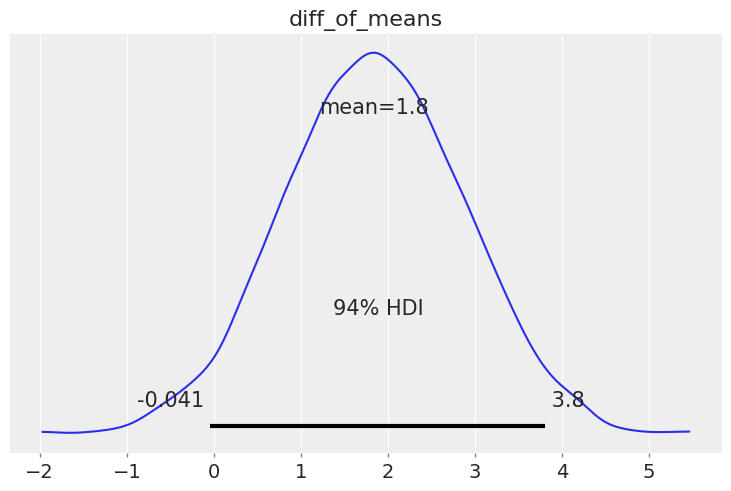

In [ ]:
az.plot_posterior(trace, var_names=["diff_of_means"])

/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1366: ImputationWarning: Data in group1_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1366: ImputationWarning: Data in group2_data contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,30.019,0.540,29.018,31.028,0.010,0.007,3290.0,2293.0,1.0
alpha,0.700,0.910,-0.717,2.634,0.020,0.016,2858.0,1918.0,1.0
sigma,13.133,0.252,12.637,13.601,0.003,0.002,6612.0,2770.0,1.0
diff_of_means,0.700,0.910,-0.717,2.634,0.020,0.016,2858.0,1918.0,1.0


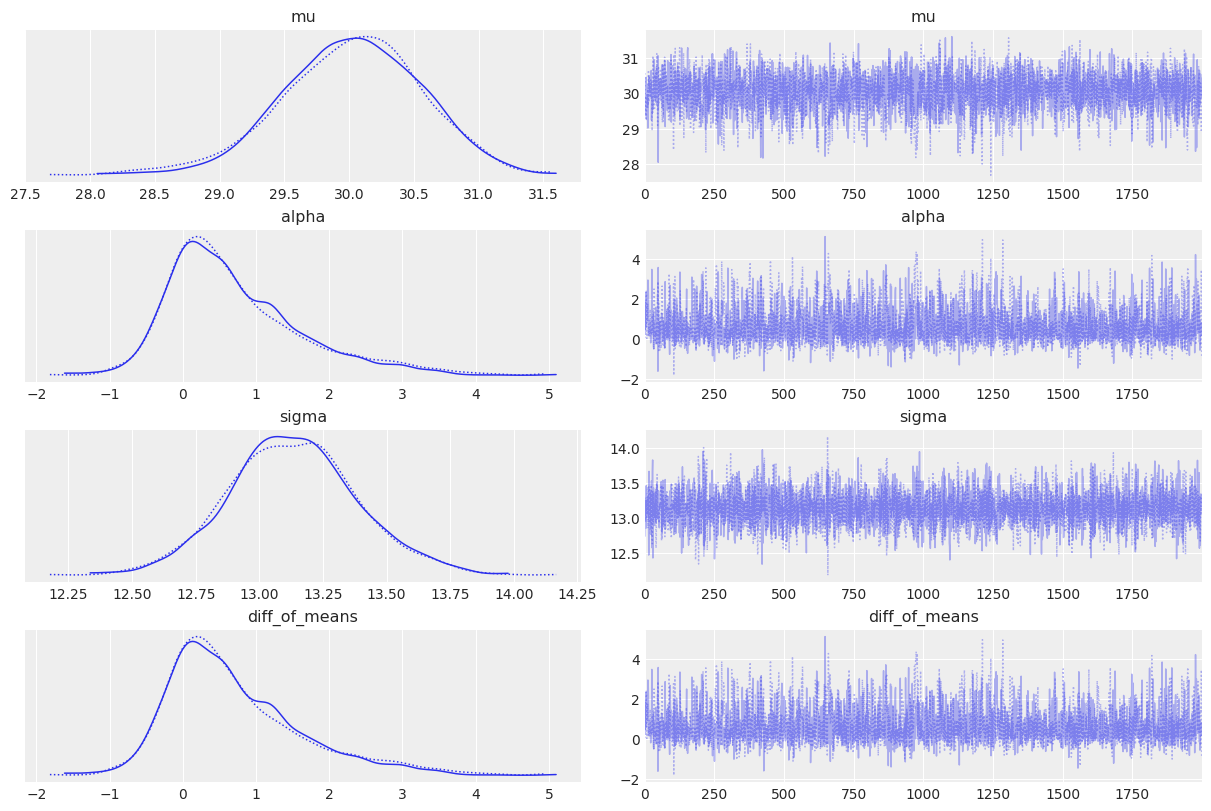

In [ ]:
group1 = data[data.mature == 'younger mom']["gained"].values
group2 = data[data.mature == 'mature mom']["gained"].values

with pm.Model() as hypothesis_model:
    # Ortak ortalama
    mu = pm.Normal("mu", mu=0, sigma=10)  # Geniş bir Normal öncül kullanıyoruz

    # İki grup arasındaki fark için Cauchy öncül
    alpha = pm.Cauchy("alpha", alpha=0, beta=0.5)

    # Ortak varyans
    sigma = pm.HalfNormal("sigma", sigma=1)

    # İki grup için gözlenen ortalamalar
    group1_data = pm.Normal("group1_data", mu=mu + alpha / 2, sigma=sigma, observed=group1)
    group2_data = pm.Normal("group2_data", mu=mu - alpha / 2, sigma=sigma, observed=group2)

    # Ortalama farkını hesaplamak için deterministic değişkeni
    diff_of_means = pm.Deterministic("diff_of_means", alpha)

    # Çıkarım
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)
    trace.extend(pm.sample_posterior_predictive(trace))

# Sonuçları gözlemleyelim
az.plot_trace(trace, var_names=["mu", "alpha", "sigma", "diff_of_means"])
az.summary(trace, var_names=["mu", "alpha", "sigma", "diff_of_means"])

<Axes: title={'center': 'diff_of_means'}>

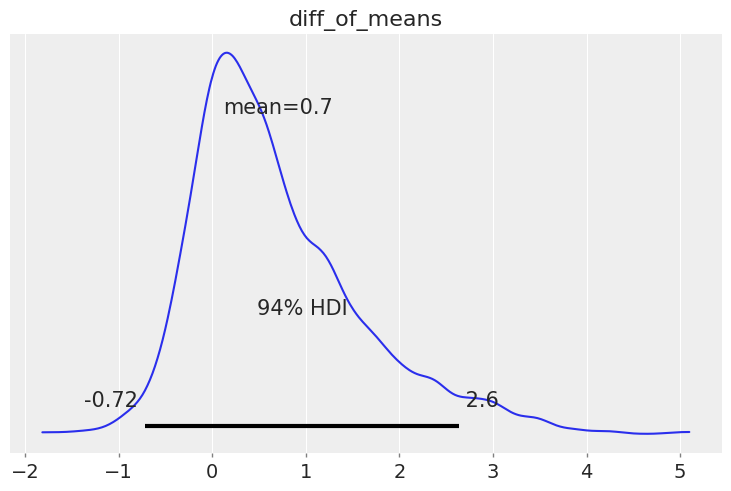

In [ ]:
az.plot_posterior(trace,var_names = ['diff_of_means'])

# Linear Regression

In [ ]:
data = pd.read_csv("bodyfat.csv")
data.head()

,Unnamed: 0,Density,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
model = sm.OLS(endog = data.Bodyfat,
       exog = sm.add_constant(data.Abdomen))

In [ ]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bodyfat   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     488.9
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           9.09e-61
Time:                        06:39:32   Log-Likelihood:                -755.90
No. Observations:                 252   AIC:                             1516.
Df Residuals:                     250   BIC:                             1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.2802      2.660    -14.765      0.000     -44.520     -34.041
Abdomen        0.6313      0.029     22.112      0.000       0.575       0.688
==============================================================================
Omnibus:                        1.088   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.875
Skew:                          -0.137   Prob(JB):                        0.646
Kurtosis:                       3.092   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

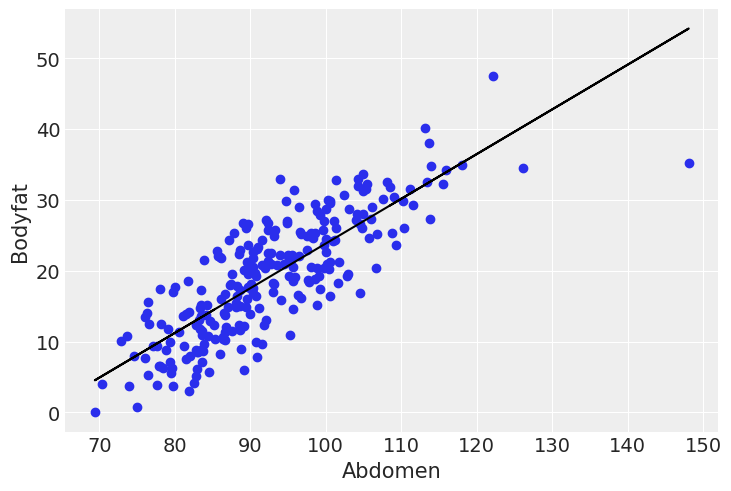

In [ ]:
plt.figure()
plt.scatter(data.Abdomen, data.Bodyfat)
plt.xlabel("Abdomen")
plt.ylabel("Bodyfat")
plt.plot(data.Abdomen, results.predict(sm.add_constant(data.Abdomen)), color = "black")
plt.show()

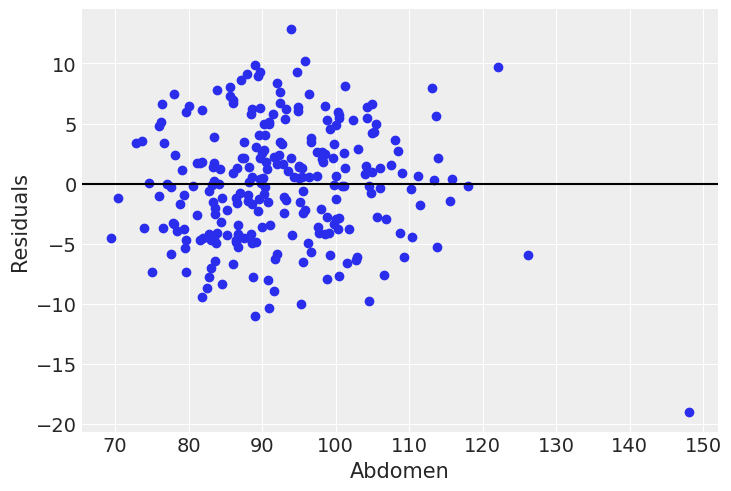

In [ ]:
plt.figure()
plt.scatter(data.Abdomen, results.resid)
plt.axhline(y = 0, color = "black")
plt.xlabel("Abdomen")
plt.ylabel("Residuals")
plt.show()

In [ ]:
data.Abdomen.max(),data.Abdomen.min(),data.Abdomen.mean()

(148.1, 69.4, 92.55595238095238)

<Figure size 720x480 with 0 Axes>

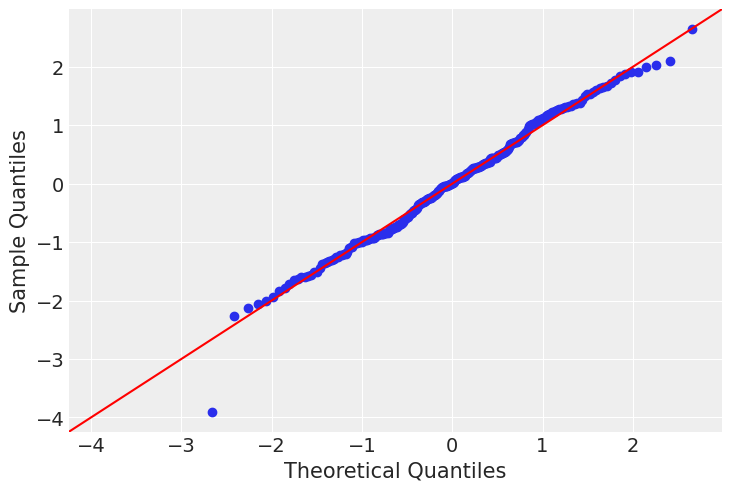

In [ ]:
plt.figure()
sm.qqplot(results.resid,line = "45",fit = True)
plt.show()

<Axes: xlabel='Abdomen', ylabel='Bodyfat'>

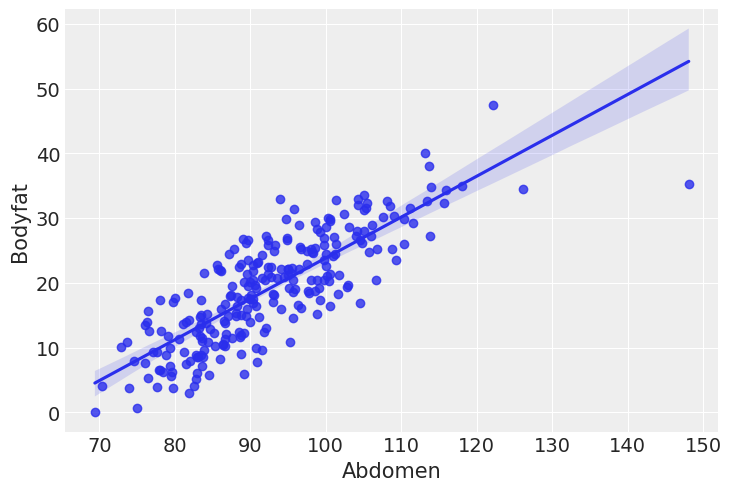

In [ ]:
sns.regplot(data = data, x = "Abdomen", y = "Bodyfat")

In [ ]:
prediction = results.get_prediction(sm.add_constant(data.Abdomen))
prediction_frame = prediction.summary_frame(alpha = 0.05)
prediction_frame.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14.506949,0.372171,13.773958,15.239939,4.872827,24.141070
1,13.118079,0.410901,12.308810,13.927348,3.477854,22.758304
2,16.211471,0.334776,15.552130,16.870811,6.582672,25.840269
3,15.264514,0.353970,14.567371,15.961657,5.633053,24.895975
4,23.850254,0.373596,23.114456,24.586051,14.215918,33.484589


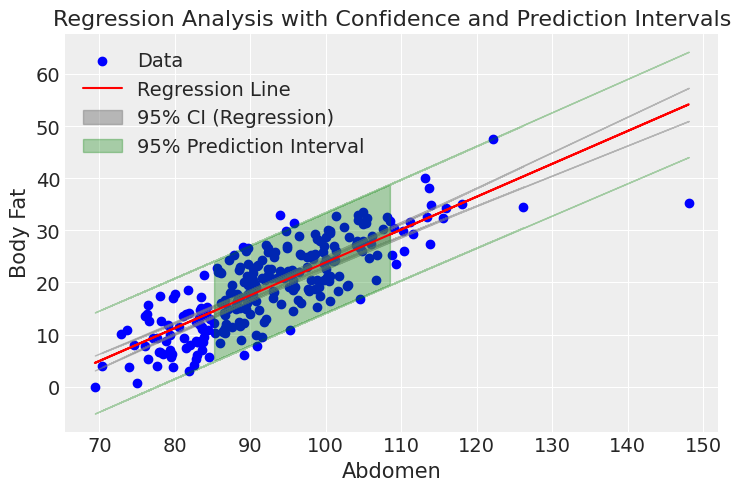

In [ ]:
plt.scatter(data['Abdomen'], data['Bodyfat'], color='blue', label='Data')
plt.plot(data['Abdomen'], prediction_frame['mean'], color='red', label='Regression Line')
plt.fill_between(data['Abdomen'], prediction_frame['mean_ci_lower'], prediction_frame['mean_ci_upper'], color='gray', alpha=0.5, label='95% CI (Regression)')
plt.fill_between(data['Abdomen'], prediction_frame['obs_ci_lower'], prediction_frame['obs_ci_upper'], color='green', alpha=0.3, label='95% Prediction Interval')
plt.xlabel('Abdomen')
plt.ylabel('Body Fat')
plt.title('Regression Analysis with Confidence and Prediction Intervals')
plt.legend()
plt.show()

# Bayesian Linear Regression

In [ ]:
!pip install bambi

In [ ]:
import bambi as bmb

In [ ]:
bayes_model = bmb.Model("Bodyfat ~ Abdomen", data = data)

In [ ]:
bayes_model

       Formula: Bodyfat ~ Abdomen
        Family: gaussian
          Link: mu = identity
  Observations: 252
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 19.1508, sigma: 180.7914)
            Abdomen ~ Normal(mu: 0.0, sigma: 1.9402)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 8.3521)

In [ ]:
priors = {"x": bmb.Prior("HalfNormal",sigma = 3),
          "sigma": bmb.Prior("Gamma", mu = 1,sigma = 2)}

bayes_model2 = bmb.Model("Bodyfat ~ Abdomen", data = data, priors = priors)

In [ ]:
bayes_model2

       Formula: Bodyfat ~ Abdomen
        Family: gaussian
          Link: mu = identity
  Observations: 252
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 19.1508, sigma: 180.7914)
            Abdomen ~ Normal(mu: 0.0, sigma: 1.9402)
        
        Auxiliary parameters
            sigma ~ Gamma(mu: 1.0, sigma: 2.0)

In [ ]:
inference = bayes_model.fit()

Output()

Output()

array([<Axes: title={'center': 'Abdomen'}>,
       <Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

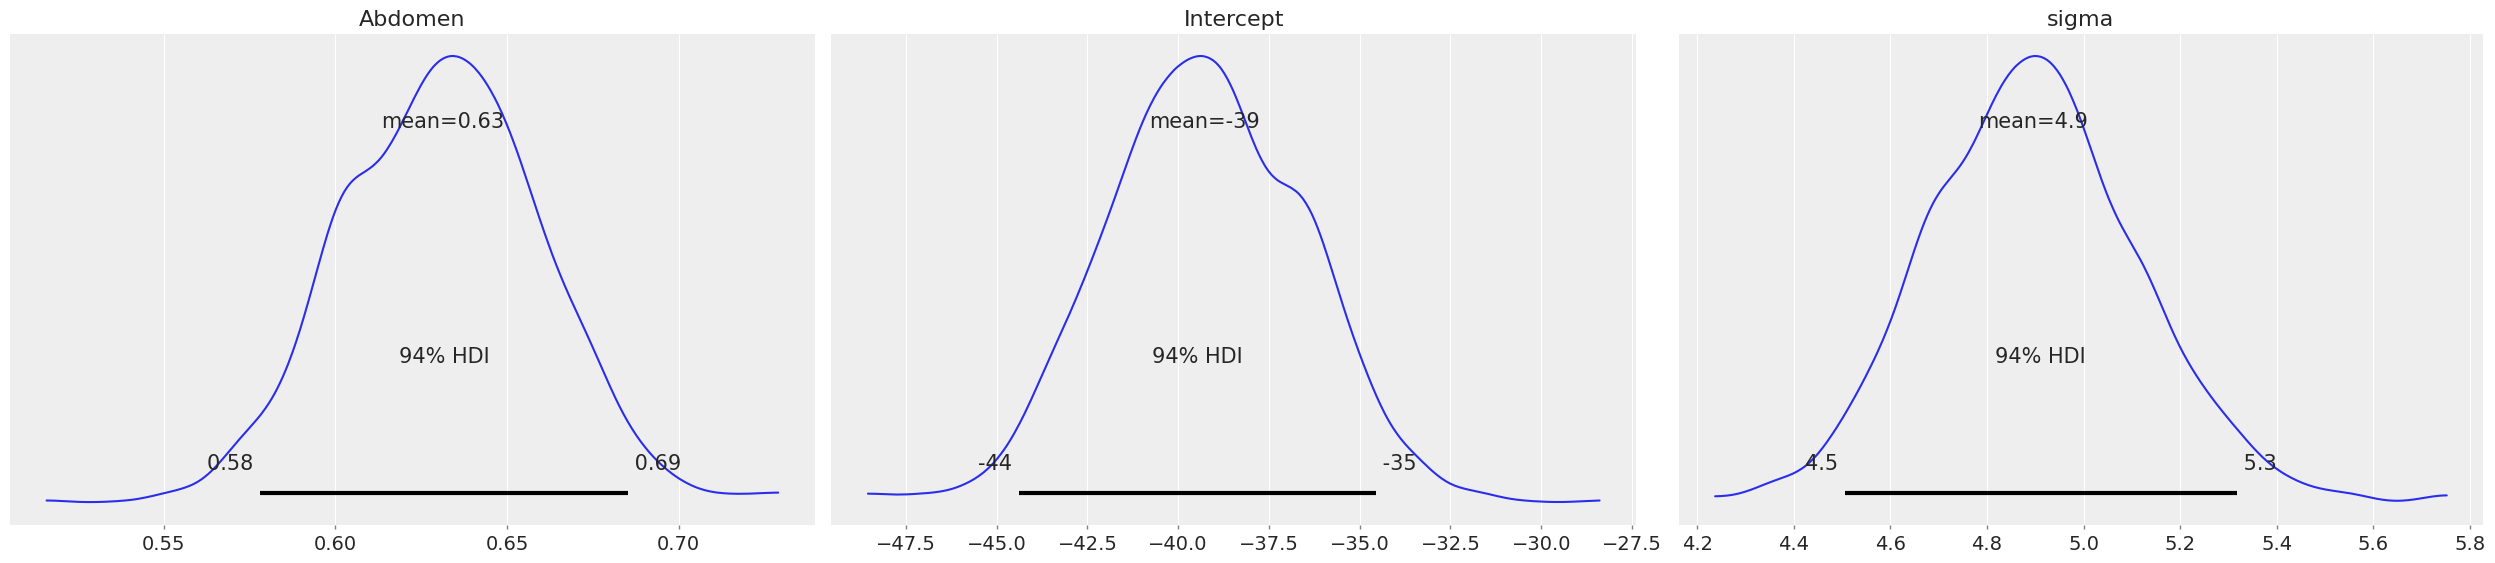

In [ ]:
az.plot_posterior(inference)

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


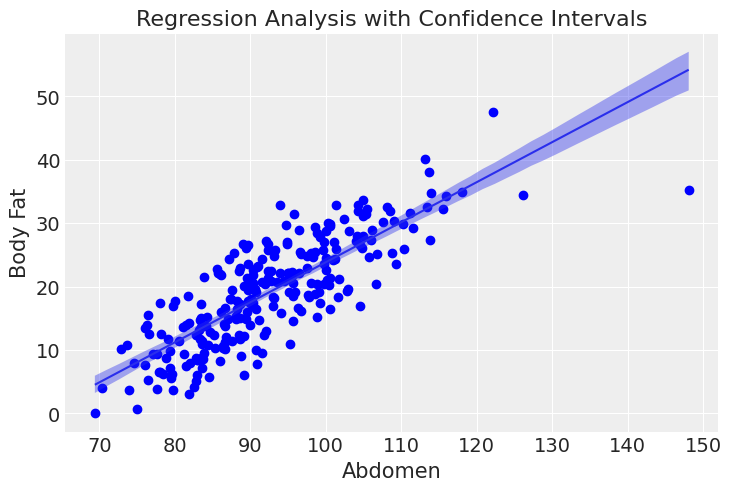

In [ ]:
fig,ax = plt.subplots()
ax.scatter(data['Abdomen'], data['Bodyfat'], color='blue')
bmb.interpret.plot_predictions(bayes_model,inference,["Abdomen"],ax=ax)
plt.xlabel('Abdomen')
plt.ylabel('Body Fat')
plt.title('Regression Analysis with Confidence Intervals')
plt.legend()
plt.show()

In [ ]:
regression_summary = az.summary(inference)
regression_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Abdomen,0.631,0.029,0.578,0.685,0.001,0.000,3118.0,1689.0,1.0
Intercept,-39.270,2.720,-44.386,-34.549,0.048,0.034,3194.0,1550.0,1.0
sigma,4.896,0.218,4.505,5.317,0.004,0.003,2713.0,1390.0,1.0
mu[0],14.506,0.384,13.786,15.197,0.007,0.005,3378.0,1887.0,1.0
mu[1],13.117,0.426,12.342,13.886,0.007,0.005,3473.0,1722.0,1.0
...,...,...,...,...,...,...,...,...,...
mu[247],13.496,0.414,12.740,14.238,0.007,0.005,3440.0,1856.0,1.0
mu[248],27.003,0.458,26.103,27.817,0.009,0.006,2595.0,1589.0,1.0
mu[249],31.105,0.611,29.979,32.233,0.012,0.008,2718.0,1608.0,1.0
mu[250],24.667,0.384,23.967,25.380,0.008,0.005,2551.0,1341.0,1.0


/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


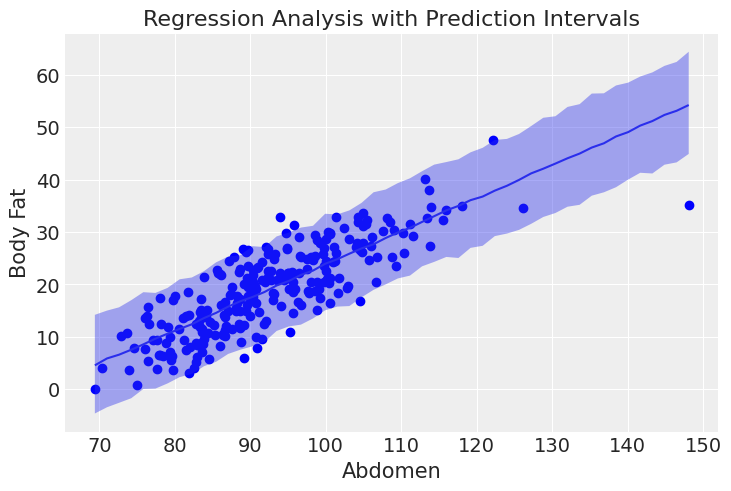

In [ ]:
fig,ax = plt.subplots()
ax.scatter(data['Abdomen'], data['Bodyfat'], color='blue')
bmb.interpret.plot_predictions(bayes_model,inference,["Abdomen"],ax=ax,pps = True)
plt.xlabel('Abdomen')
plt.ylabel('Body Fat')
plt.title('Regression Analysis with Prediction Intervals')
plt.show()

## Bayesian Update

In [ ]:
posterior_samples = inference.posterior["Abdomen"].values.flatten()

In [ ]:
bayes_model3 = bmb.Model("Bodyfat ~ Abdomen", data = data,
                         priors = {"x": pm.DensityDist.dist(posterior_samples)})

In [ ]:
inference2 = bayes_model3.fit()

Output()

Output()

array([<Axes: title={'center': 'Abdomen'}>,
       <Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

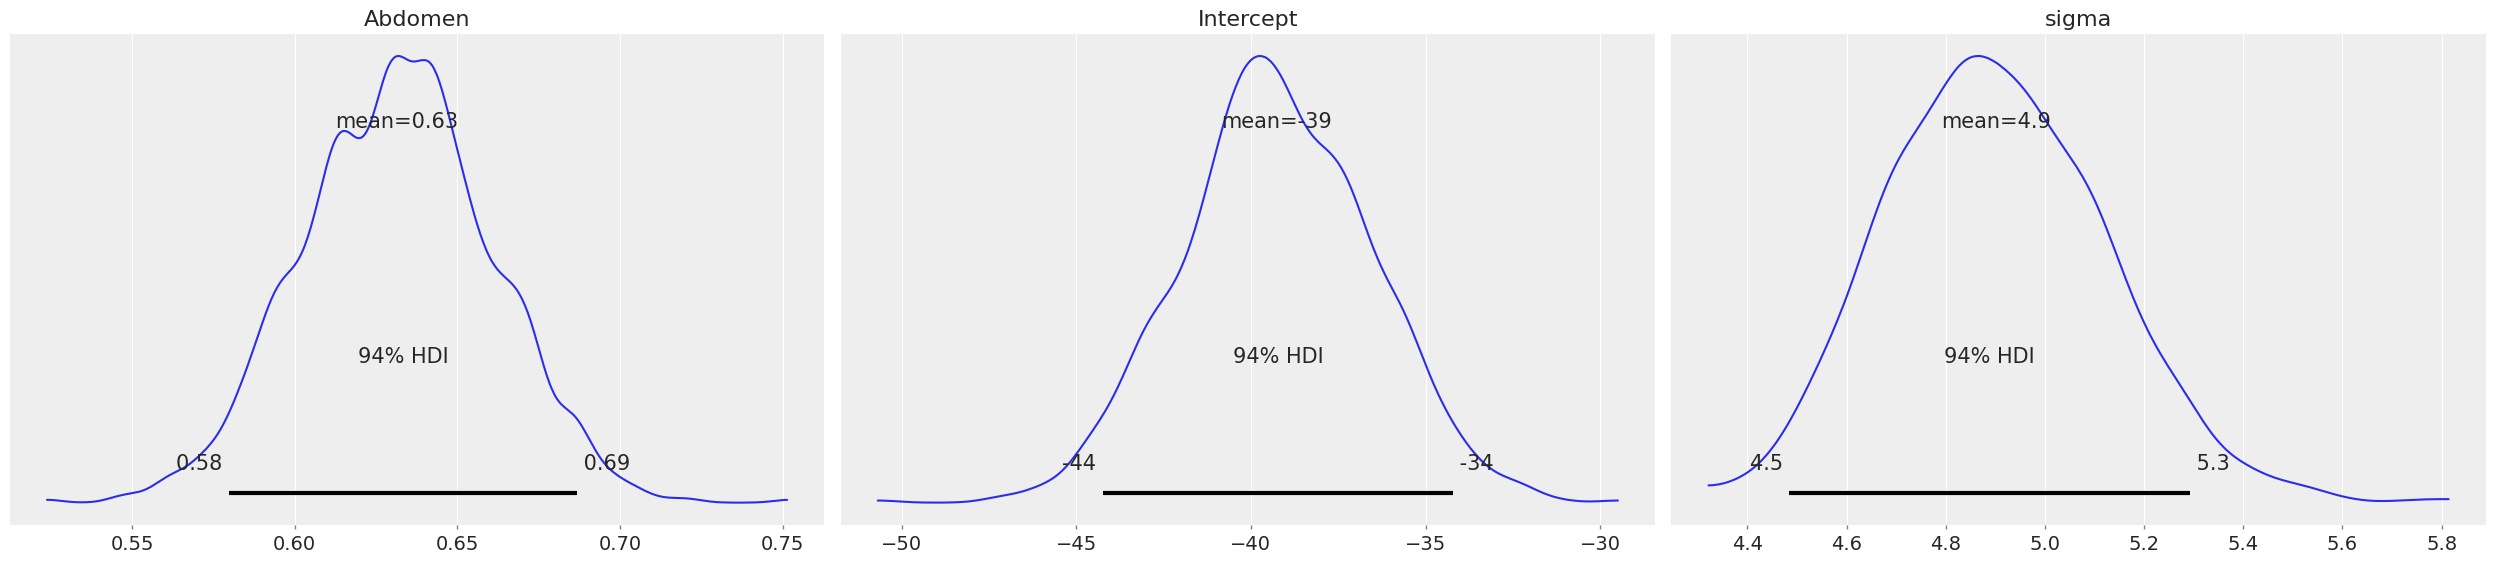

In [ ]:
az.plot_posterior(inference2)

In [ ]:
from lightgbm import LGBMRegressor, plot_importance

In [ ]:
data.head()

,Unnamed: 0,Density,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
model = LGBMRegressor()
model.fit(data.iloc[:,3:],data.Bodyfat)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

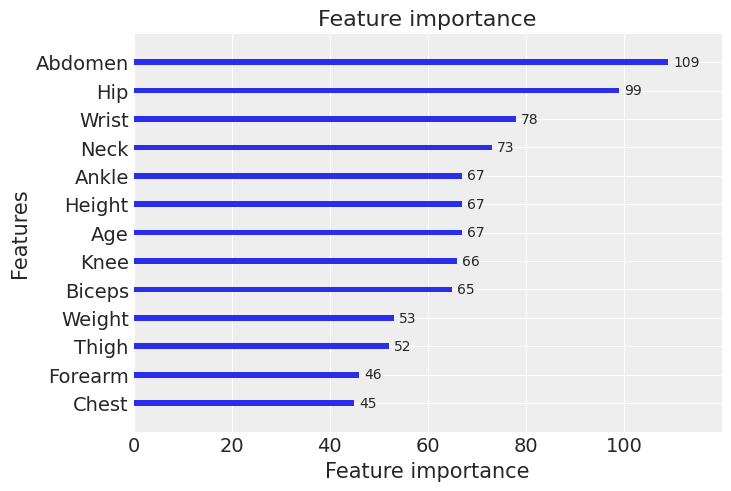

In [ ]:
plot_importance(model)